In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import zoom
import os

In [2]:
img = nib.load('data/training/img/img0008.nii.gz')
data = img.get_fdata()
print(np.shape(data))
print(np.ndarray.max(data))
print(np.ndarray.min(data))

(512, 512, 148)
3071.0
-1024.0


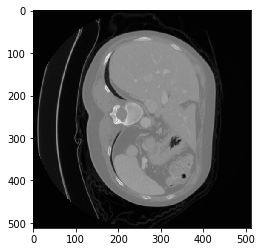

In [3]:
%matplotlib inline
plt.imshow(data[:,:,120], cmap='gray')
plt.show()

In [4]:
imglabel = nib.load('data/training/label/label0008.nii.gz')
datalabel = imglabel.get_fdata()

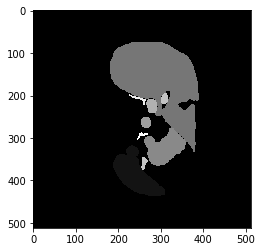

In [5]:
%matplotlib inline
plt.imshow(datalabel[:,:,120], cmap='gray')
plt.show()

In [6]:
# smallerCT = cv2.resize(datalabel, dsize=(256, 256), interpolation=cv2.INTER_AREA)

(512, 512, 148)
(128, 128, 148)


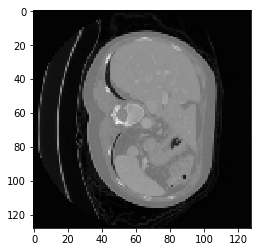

In [7]:
print(np.shape(data))
# scale = np.round(130/np.shape(data)[2], decimals=2)
# scale = 1
# print(scale)
# data = zoom(data, (0.5, 0.5, scale))
data = data[0:511:4, 0:511:4, :]
print(np.shape(data))
%matplotlib inline
plt.imshow(data[:,:,120], cmap='gray')
plt.show()

(128, 128, 148)


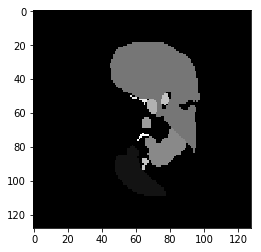

<class 'numpy.ndarray'>


In [8]:
# datalabel = zoom(datalabel, (0.5, 0.5, scale)).astype(int)
# datalabel = np.round(cv2.resize(datalabel, dsize=(256, 256), interpolation=cv2.INTER_AREA))
datalabel = datalabel[0:511:4, 0:511:4, :]
print(np.shape(datalabel))
%matplotlib inline
plt.imshow(datalabel[:,:,120], cmap='gray')
plt.show()
print(type(datalabel))

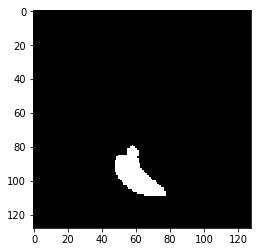

In [9]:
%matplotlib inline
spleenlabel = datalabel
spleenlabel[np.where(spleenlabel != 1)] = 0
plt.imshow(spleenlabel[:,:,120], cmap='gray')
plt.show()

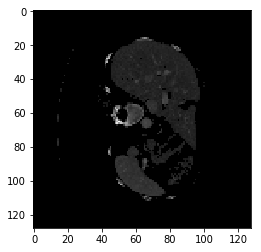

In [10]:
%matplotlib inline
spleen = data
spleen[np.where(spleen < 100)] = 0
plt.imshow(spleen[:,:,120], cmap='gray')
plt.show()

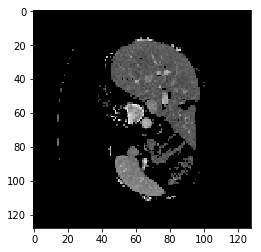

In [11]:
%matplotlib inline
spleen[np.where(spleen > 400)] = 0
plt.imshow(spleen[:,:,120], cmap='gray')
plt.show()

In [12]:
spleenslices = np.sum(spleenlabel, axis=(0, 1), keepdims=False)
numslices = np.shape(spleenslices)[0]
print(numslices)
numspleenslices = np.shape(np.where(spleenslices))[1]
print(numspleenslices)
float(numspleenslices)/numslices

148
27


0.18243243243243243

In [16]:
folder = 'data/training/label/'
numslicestotal = np.zeros((1, 30), int)
numspleenstotal = np.zeros((1, 30), int)
index = 0
for filename in os.listdir(folder):
    label = nib.load(folder+filename).get_fdata()
    label = label[0:511:4, 0:511:4, :]
    spleenlabel = label
    spleenlabel[np.where(spleenlabel != 1)] = 0
    spleenslices = np.sum(spleenlabel, axis=(0, 1), keepdims=False)
    numslices = np.shape(spleenslices)[0]
    numspleenslices = np.shape(np.where(spleenslices))[1]
    numslicestotal[0, index] = numslices
    numspleenstotal[0, index] = numspleenslices
    index = index+1

In [17]:
print(numslicestotal)
print(np.sum(numslicestotal, axis=(1)))
print(np.sum(numslicestotal, axis=(1))/30)
print(np.average(numspleenslices/numslicestotal))

[[139 124 100 148 148  96 195 131 153 131 140 147  94 149  90  89 144 184
  117 143 163 100 198  85  98  88  93 104  89  99]]
[3779]
[125.96666667]
0.16080637319757354


In [21]:
print(np.sum(numspleenstotal))
864/3779

864


0.22863191320455148

In [ ]:
# concat = nib.load('data/training/img/img_concatenated.nii.gz').get_fdata()

In [ ]:
# np.shape(concat)

In [ ]:
# %matplotlib inline
# plt.imshow(concat[:,:,0], cmap='gray')
# plt.show()

In [15]:
#working on weighted sampling
folder = 'data/training/label/'
for filename in os.listdir(folder):
    label = nib.load(folder+filename).get_fdata()
    label = label[0:511:4, 0:511:4, :]
    spleenlabel = label
    spleenlabel[np.where(spleenlabel != 1)] = 0
    spleenslices = np.sum(spleenlabel, axis=(0, 1), keepdims=False)
    spleenslices = np.where(spleenslices)


(array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125]),)
(array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),)
(array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]),)
(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128]),)
(array([107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133]),)
(array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85]),)
(array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124]),)
(array([66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

In [2]:
from utils import soft_tissue_window
example = nib.load('data/training/slices/img/img0001_120.nii.gz').get_fdata()
example_filtered = soft_tissue_window(example)

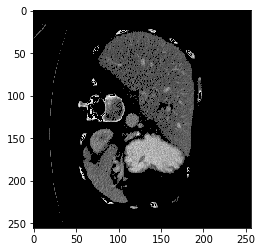

In [5]:
%matplotlib inline
fig = plt.figure()
plt.imshow(example, cmap='gray')
fig.savefig('intensity_filtering_example')